# Contents :

0. About Data
1. Import Libraries and data
2. Data Inspection
3. Data Cleaning :
    - Missing values imputation
    - Dealing with inconsistent values
4. Data Visualization
5. Feature Engineering
6. Feature Scalling
7. Building Models
8. Conclusion

## About Data

- Item_Identifier : Unique product ID

- Item_Weight : Weight of product

- Item_Fat_Content : Whether the product is low fat or not

- Item_Visibility : The % of total display area of all products in a store allocated to the particular product

- Item_Type : The category to which the product belongs

- Item_MRP : Maximum Retail Price (list price) of the product

- Outlet_Identifier : Unique store ID

- Outlet_Establishment_Year : The year in which store was established

- Outlet_Size : The size of the store in terms of ground area covered

- Outlet_Location_Type : The type of city in which the store is located

- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales : Sales of the product in the particular store.

## Import Libraries and data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

import chardet
import fuzzywuzzy
from scipy import stats
import missingno as mno
from fuzzywuzzy import process
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import xgboost as xg
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

### Import Data

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

## Data inspection

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

As above in the training data we have 8523 rows and 12 columns while in the test data we have 5681 rows and 11 columns.

In [4]:
# getting null values in training data
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#17 % of the item_weight column is null while 28% of the outlet_size column is null in test data
(train.isna().sum()/train.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
# getting null values in test data 
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
#25 % of the item_weight column is null while 42% of the outlet_size column is null in test data
(train.isna().sum()/test.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  25.752508
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  42.422109
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
train_original=train.copy() 
test_original=test.copy()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
categorical = train.select_dtypes(include = [np.object])
numerical = train.select_dtypes(include = [np.float64 ,np.int64 ])
print(f'there is {categorical.shape[1]} categorical columns and {numerical.shape[1]} numerical columns in the training dataset')

there is 7 categorical columns and 5 numerical columns in the training dataset


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [12]:
categorical = test.select_dtypes(include = [np.object])
numerical = test.select_dtypes(include = [np.float64 ,np.int64 ])
print(f'there is {categorical.shape[1]} categorical columns and {numerical.shape[1]} numerical columns in the test dataset')

there is 7 categorical columns and 4 numerical columns in the test dataset


In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Data Cleaning

### Missing values imputation

#### 1) Item Weight

In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
train['Item_Weight'].isna().sum(),test['Item_Weight'].isna().sum()

(1463, 976)

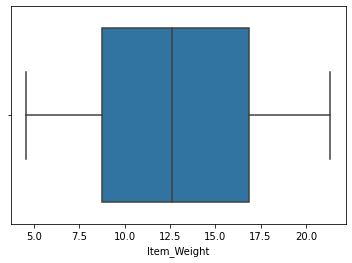

In [17]:
base_color = sns.color_palette()[0]
sns.boxplot(train['Item_Weight'],color = base_color);

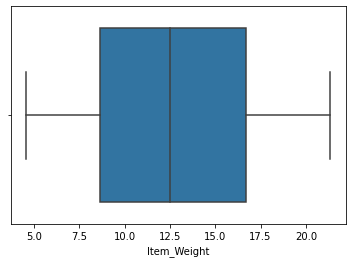

In [18]:
sns.boxplot(test['Item_Weight'],color = base_color);

- since the boxplot shows that there is no outliers then we can use the mean to impute missing values

In [19]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)

In [20]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace = True)

In [21]:
train['Item_Weight'].isna().sum(),test['Item_Weight'].isna().sum()

(0, 0)

**Item Weight missing values imputed with the mean**

#### 2) Outlet Size 

In [22]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

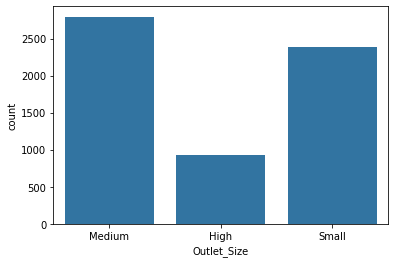

In [23]:
sns.countplot(train['Outlet_Size'] , color = base_color);

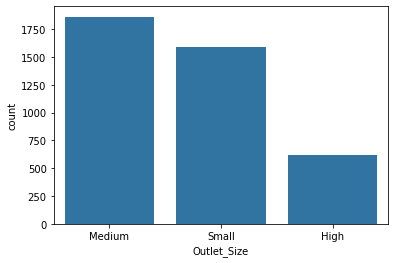

In [24]:
sns.countplot(test['Outlet_Size'] , color = base_color);

**Since the Outlet size is categorical I'll impute the missing values with mode**

In [25]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)

In [26]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace = True)

In [27]:
train['Outlet_Size'].isna().sum(),test['Outlet_Size'].isna().sum()

(0, 0)

**Outlet Size missing values imputed with the mode**

### Dealing with inconsistent values

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
# handling inconsistent values
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [32]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)
test['Item_Fat_Content']= test['Item_Fat_Content'].astype(str)


## Data Visualization

### Univariate Analysis

#### Numerical variables

In [34]:
import matplotlib.ticker as ticker
sns.set_style("whitegrid", {'axes.grid' : False})

#### 1) Item_Weight

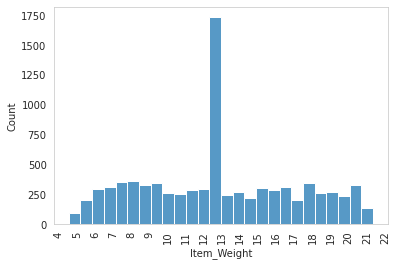

In [35]:
ax = sns.histplot(train['Item_Weight']);
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.xticks(rotation = 90);

- The data is centered about the mean
- The data is not skewed
- The data doesn't follow normal distribution

#### 2) Item_Visibility

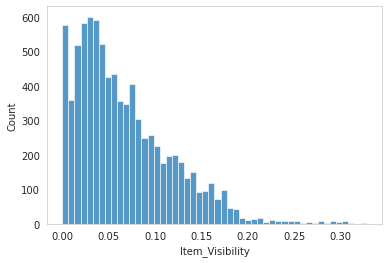

In [36]:
sns.histplot(train['Item_Visibility']);

- The data is skewed to the right
- The data doesn't follow normal distribution

#### 3) Item_MRP

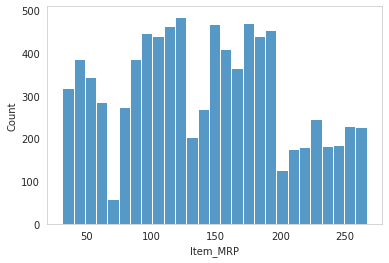

In [37]:
sns.histplot(train['Item_MRP']);


- The data is not skewed
- The data doesn't follow normal distribution
- The data has many peaks

#### 4) Outlet_Establishment_Year

In [38]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

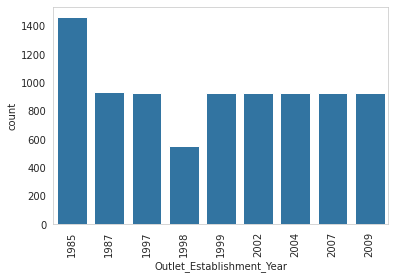

In [39]:
base_color = sns.color_palette()[0]

sns.countplot(train['Outlet_Establishment_Year'],color = base_color);

plt.xticks(rotation = 90);

- 1985 is the year with the most stores establishments

#### 5) Item_Outlet_Sales

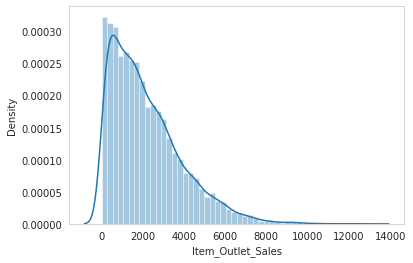

In [40]:
sns.distplot(train['Item_Outlet_Sales']);

- The data is skewed to the right
- The data shows peakness
- The data doesn't follow normal distribution

In [41]:
# check for Skewness
print("Skewness ", train['Item_Outlet_Sales'].skew())


Skewness  1.1775306028542796


#### categorical variables

##### 1) Item Fat Content

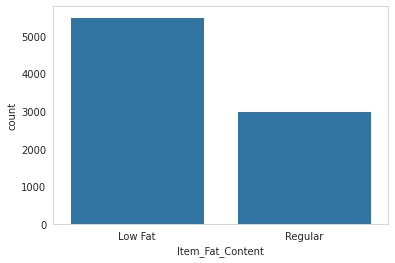

In [42]:
sns.countplot(train['Item_Fat_Content'],color = base_color);


- The Items bought are more of Low Fat.

#### 2) Item Type

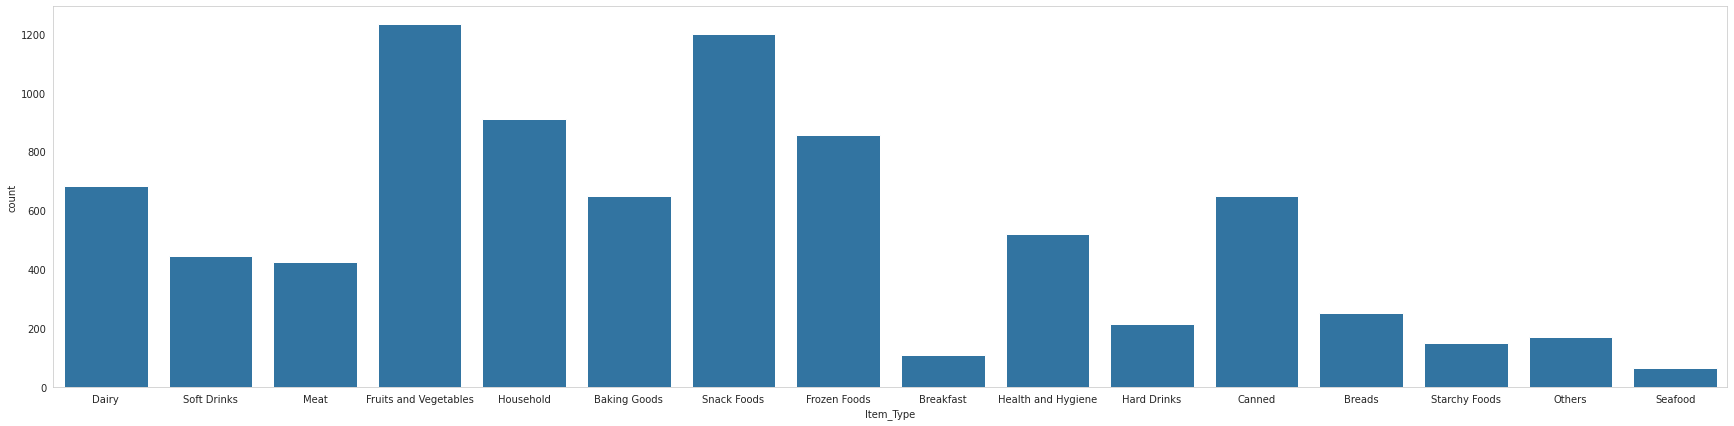

In [43]:
plt.figure(figsize=(30,7))
sns.countplot(train['Item_Type'],color = base_color);

- Fruits and vegetables have the largest amount of sales
- Snacks have a lot of sales too

#### 3) Outlet Size

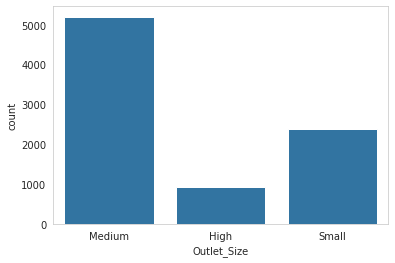

In [44]:
sns.countplot(train['Outlet_Size'],color = base_color);

- The Outlets are more of Medium Size

#### 4) Outlet Location Type

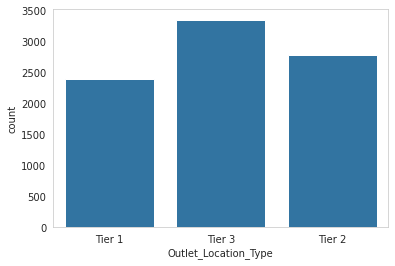

In [45]:
sns.countplot(train['Outlet_Location_Type'],color = base_color);

- The Outlets are maximum in number in Tier 3 Cities.

#### 5) Outlet Type

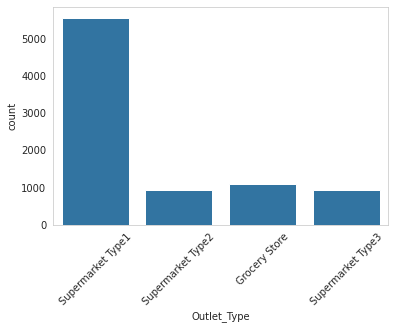

In [46]:
sns.countplot(train['Outlet_Type'],color = base_color);
plt.xticks(rotation = 45);

- The Outlets are more of Supermarket Type1.

### Bivariate Analysis

In [47]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#### 1) Item Fat Content

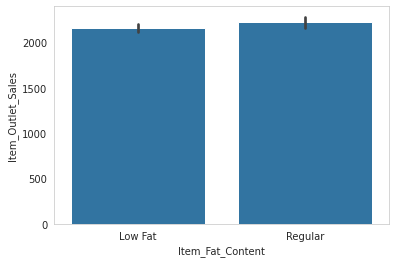

In [48]:
sns.barplot(data = train , x = 'Item_Fat_Content' , y = 'Item_Outlet_Sales' , color = base_color);

- both low fat and regular fat sales are very close

#### 2) Item Visibility

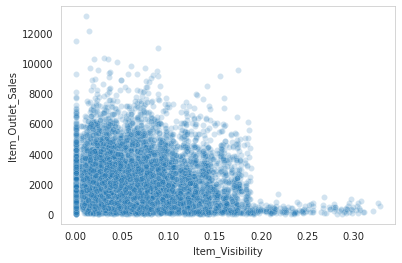

In [49]:
sns.scatterplot(data = train , x = 'Item_Visibility' , y = 'Item_Outlet_Sales' , color = base_color , alpha = 0.2);

- Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

**I'll deal with zero visibality as a missing value and change it to the mean value.**

In [50]:
train['Item_Visibility'].replace(0,train['Item_Visibility'].mean(),inplace = True)
test['Item_Visibility'].replace(0,test['Item_Visibility'].mean(),inplace = True)

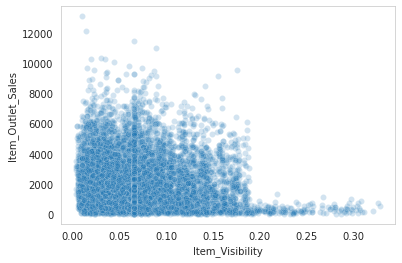

In [51]:
sns.scatterplot(data = train , x = 'Item_Visibility' , y = 'Item_Outlet_Sales' , color = base_color , alpha = 0.2);

#### 3) Item Type

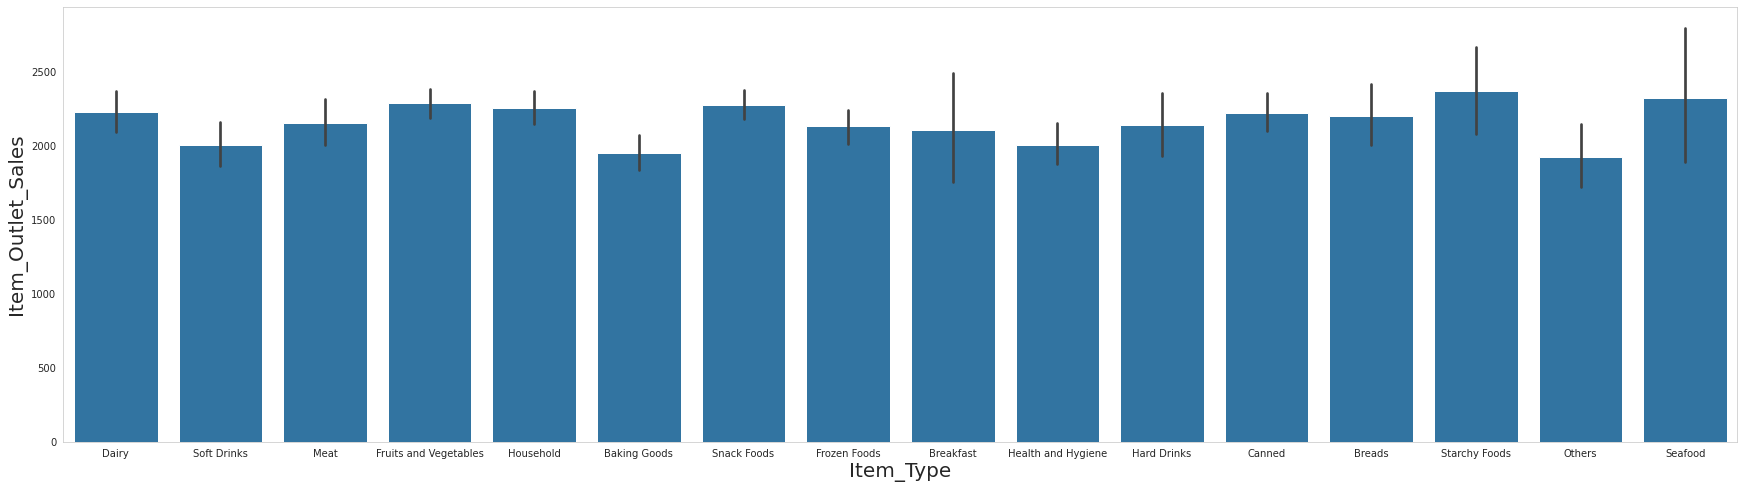

In [52]:
plt.figure(figsize=(30,8))
sns.barplot(data = train, y = 'Item_Outlet_Sales' , x = 'Item_Type' , color = base_color);
plt.xlabel('Item_Type',fontdict = {'fontsize' : 20});
plt.ylabel('Item_Outlet_Sales',fontdict = {'fontsize' : 20});

- The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

#### 4) Item MRP

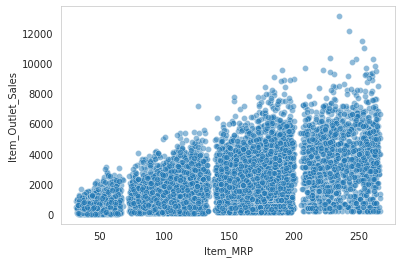

In [53]:
sns.scatterplot(data = train , x = 'Item_MRP' , y = 'Item_Outlet_Sales' , color = base_color , alpha = 0.5);

- Item MRP and item outlet sales are directly proportional.

#### 5) Outlet Size

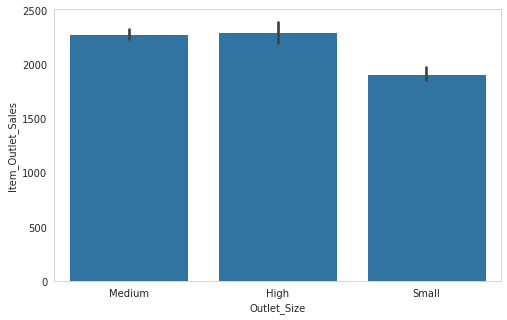

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(data = train , x = 'Outlet_Size' , y = 'Item_Outlet_Sales' , color = base_color );


- The Outlet Sales is maximum for Medium and High sized Outlets.
- The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

#### 6) Outlet Location Type

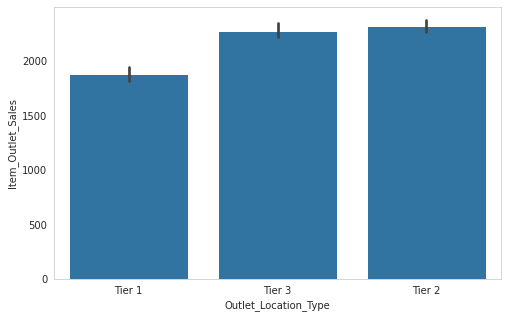

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(data = train , x = 'Outlet_Location_Type' , y = 'Item_Outlet_Sales' , color = base_color );

- The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.

### Multivariate Analysis

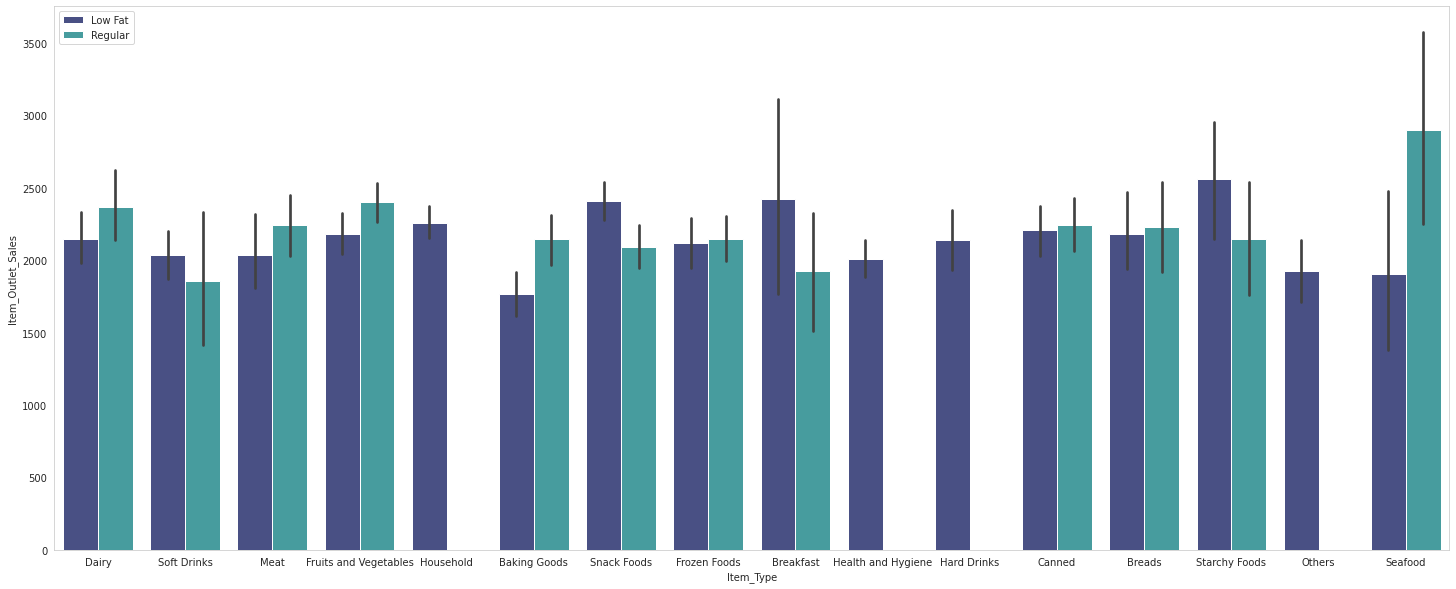

In [56]:
plt.figure(figsize=(25,10));
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako');
plt.legend();

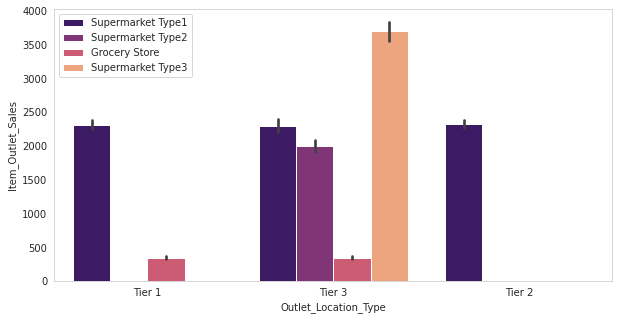

In [57]:
plt.figure(figsize=(10,5));
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma');
plt.legend();

- The Tier-3 location type has all types of Outlet type and has high sales margin.

## Feature Engineering

In [58]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
for i in var_mod:
    train[i] = le.fit_transform(train[i])
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [60]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052


In [61]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [62]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [63]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
y= train['Item_Outlet_Sales']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

## Features Scalling

In [65]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']

## Building Models

### normalizing data

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Item_Weight','Item_Visibility','Item_MRP']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])
test[numerical_features] = scaler.fit_transform(test[numerical_features])

In [67]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.897460e+00,0,-1.285395,13,-0.536555,1,0,1
1,-1.035530e+00,1,-0.647603,4,-0.868937,1,1,1
2,4.486336e-01,0,0.616028,11,1.629848,1,2,0
3,-1.267578e+00,0,-1.123718,13,0.226697,1,1,1
4,4.184768e-16,1,1.009174,4,1.508110,1,2,3


### 1) Linear regression

In [68]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()

In [69]:
coef2

Outlet_Location_Type    -432.609879
Outlet_Size             -334.535227
Item_Visibility          -85.421881
Item_Weight               -0.134558
Item_Type                  1.717454
Item_Fat_Content          36.019771
Item_MRP                 965.244359
Outlet_Type             1005.489648
dtype: float64

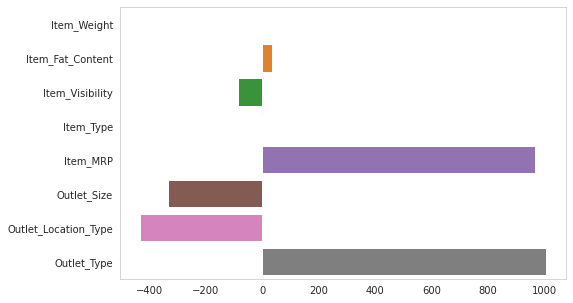

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features);

#### Evaluating the model

##### a) R-Squared:
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

- If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [71]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.4943364954963302

##### b) MAE and MSE:
- MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
- MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

In [72]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [73]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 932.7716065759904
mean squared error: 1562664.0102315343


##### c) RMSE:
RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [74]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1250.0656023711454


### 2) Random Forest Regressor

In [75]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [76]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.544298
Outlet_Type             0.454466
Item_Weight             0.000479
Outlet_Location_Type    0.000335
Item_Visibility         0.000304
Item_Type               0.000098
Outlet_Size             0.000021
Item_Fat_Content        0.000000
dtype: float64

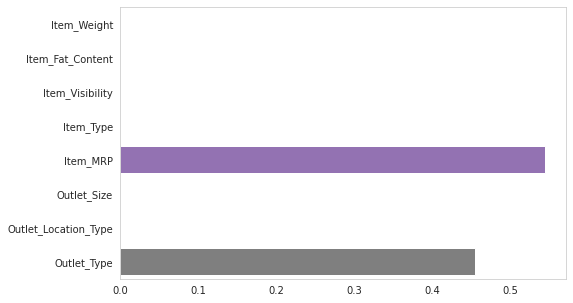

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features);

### XGBoost

In [78]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
# Fitting the model on our trained dataset.
xgb_r.fit(X_train,y_train)

# Making Predictions
y_pred = xgb_r.predict(X_test)

[11:49:55] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [79]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.544298
Outlet_Type             0.454466
Item_Weight             0.000479
Outlet_Location_Type    0.000335
Item_Visibility         0.000304
Item_Type               0.000098
Outlet_Size             0.000021
Item_Fat_Content        0.000000
dtype: float64

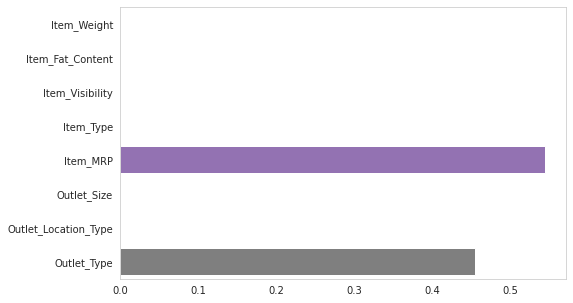

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features);

### Comparing the models score

In [81]:
from sklearn.model_selection  import cross_val_score
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [82]:
cross_val(LR,LinearRegression(),X,y,5)

LinearRegression() Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression() score: 0.51


In [83]:
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.56
0.52
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.54


In [84]:
cross_val(xgb_r,xg.XGBRegressor(),X,y,5)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None) Scores:
0.55
0.51
0.48
0.54
0.55
Average XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
            

**Random forrest model clearly did the best .**

## Conclusions

- Item_MRP clearly maximises the Outlet sales.
- Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.